# Business Problem
Navigating the intricate landscape of healthcare, the challenge of patient readmission emerges as a critical concern that demands innovative solutions. Patient readmission, or the return of a patient to the hospital shortly after discharge, not only poses a significant financial burden on healthcare systems but also underscores potential gaps in patient care. High rates of readmission often signal unresolved health issues, insufficient post-discharge support, or inadequate coordination among healthcare providers. This recurrent cycle not only impacts the well-being of patients but also places additional strain on healthcare resources.

Addressing the problem of patient readmission is not merely about reducing costs; it is fundamentally rooted in a commitment to enhancing the overall quality of patient care, ensuring seamless transitions between hospital and home, and ultimately fostering a healthcare system that prioritizes sustained well-being and optimal recovery.

# Technical Problem
With MediWatch, our aim is to design a predictive model to assess and anticipate the likelihood of patient readmission.

MediWatch analyzes a myriad of patient-specific factors, such as medical history, demographic information, treatment protocols, post-discharge follow-ups etc. to generate a comprehensive prediction model. The system aims to proactively identify individuals at a higher risk of readmission, allowing healthcare providers to implement targeted interventions and personalized care plans.

Authors:
  - Kashyap K. R. Kambhatla, Ph.D.
  - Aaron Nicholson

# Data Loading

In [1]:
import os
import pandas as pd
import requests
from google.colab import drive # Used for mounting Google Drive

In [2]:
# Mount Google Drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Set the path to a folder in your Google Drive
data_path = '/content/gdrive/MyDrive/Colab Notebooks/MediWatch_Capstone_2024/'
input_data_folder = os.path.join(data_path, 'input_data')

In [4]:
# Create the input_data folder if it doesn't exist
if not os.path.exists(input_data_folder):
    os.makedirs(input_data_folder)

In [5]:
# Download the dataset
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
dataset_zip_path = os.path.join(input_data_folder, 'dataset_diabetes.zip')

In [6]:
# Download the file
response = requests.get(dataset_url)
with open(dataset_zip_path, 'wb') as f:
    f.write(response.content)

In [7]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(input_data_folder)


In [160]:
# Load the dataset into a DataFrame
data_file_path = os.path.join(input_data_folder, 'dataset_diabetes/diabetic_data.csv')
data = pd.read_csv(data_file_path)

# Data Cleaning

In [161]:
# Print the shape
# Overview of dataframe
rows = data.shape[0]
cols = data.shape[1]
print('#samples  (rows)    =  {}'.format(rows))
print('#features (columns) =  {}'.format(cols))
# Print the data types dtypes
print("\nData types:\n", data.dtypes)

#samples  (rows)    =  101766
#features (columns) =  50

Data types:
 encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide         

In [162]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [163]:
#displaying first 10 rows of data
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [164]:
#Checking the unique values of the columns
def get_unique_values(data):
  for col in data.columns:
    print(f"Unique values of {col}: {data[col].unique()}")

get_unique_values(data)

Unique values of encounter_id: [  2278392    149190     64410 ... 443854148 443857166 443867222]
Unique values of patient_nbr: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
Unique values of race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Unique values of gender: ['Female' 'Male' 'Unknown/Invalid']
Unique values of age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values of weight: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Unique values of admission_type_id: [6 1 2 3 4 5 8 7]
Unique values of discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Unique values of admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
Unique values of time_in_hospital: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Unique values of payer_code: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' '

### Observation
Though max_glu_serum and A1Cresult have nan as a value, it is an acceptable value as per the paper "Impact of HbA1c Measurement on Hospital Readmission Rates:
Analysis of 70,000 Clinical Database Patient Records"



* Glucose serum test result: Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,”
“normal,” and “none” if not measured
* A1c test result: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% and “none” if not measured.


In [165]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
def check_missing_values(data):
  for col in data.columns:
    num_missing = data[col][data[col] == '?'].count()
    percent_missing = (data[col] == '?').mean() * 100
    print(f'{col},\t {num_missing},\t {percent_missing:.2f}%')

check_missing_values(data)

encounter_id,	 0,	 0.00%
patient_nbr,	 0,	 0.00%
race,	 2273,	 2.23%
gender,	 0,	 0.00%
age,	 0,	 0.00%
weight,	 98569,	 96.86%
admission_type_id,	 0,	 0.00%
discharge_disposition_id,	 0,	 0.00%
admission_source_id,	 0,	 0.00%
time_in_hospital,	 0,	 0.00%
payer_code,	 40256,	 39.56%
medical_specialty,	 49949,	 49.08%
num_lab_procedures,	 0,	 0.00%
num_procedures,	 0,	 0.00%
num_medications,	 0,	 0.00%
number_outpatient,	 0,	 0.00%
number_emergency,	 0,	 0.00%
number_inpatient,	 0,	 0.00%
diag_1,	 21,	 0.02%
diag_2,	 358,	 0.35%
diag_3,	 1423,	 1.40%
number_diagnoses,	 0,	 0.00%
max_glu_serum,	 0,	 0.00%
A1Cresult,	 0,	 0.00%
metformin,	 0,	 0.00%
repaglinide,	 0,	 0.00%
nateglinide,	 0,	 0.00%
chlorpropamide,	 0,	 0.00%
glimepiride,	 0,	 0.00%
acetohexamide,	 0,	 0.00%
glipizide,	 0,	 0.00%
glyburide,	 0,	 0.00%
tolbutamide,	 0,	 0.00%
pioglitazone,	 0,	 0.00%
rosiglitazone,	 0,	 0.00%
acarbose,	 0,	 0.00%
miglitol,	 0,	 0.00%
troglitazone,	 0,	 0.00%
tolazamide,	 0,	 0.00%
examide,	 0

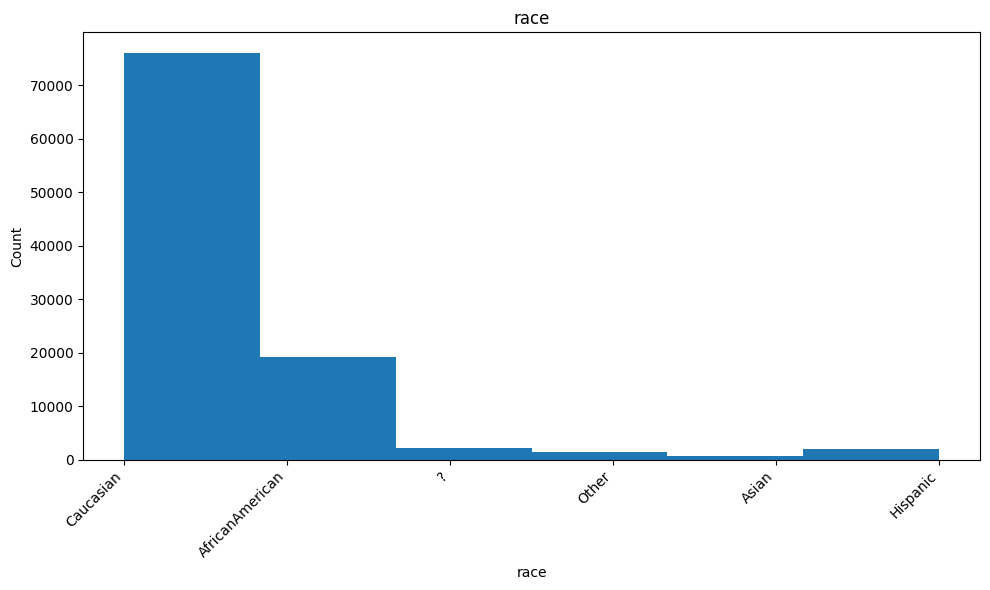

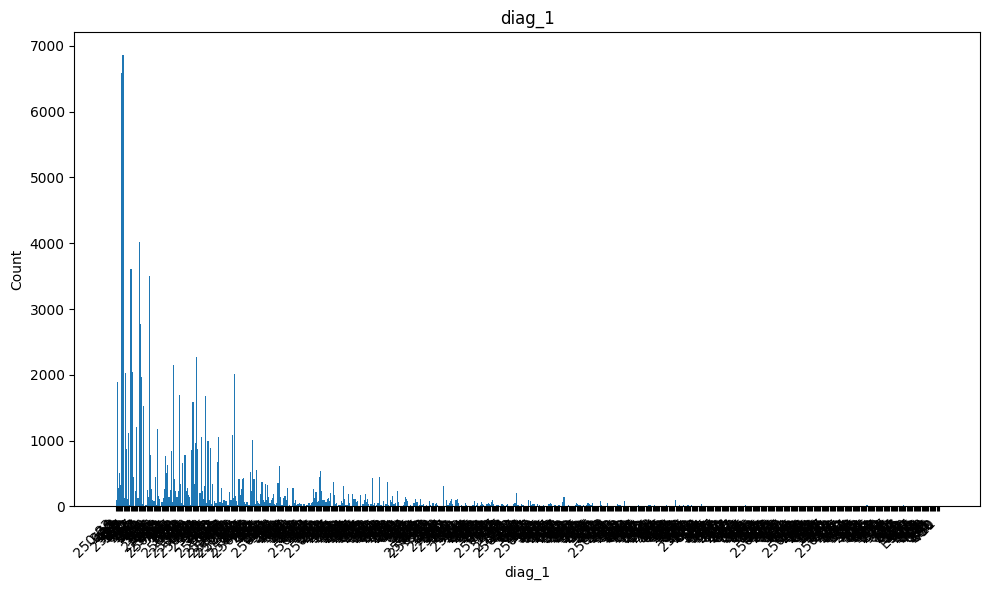

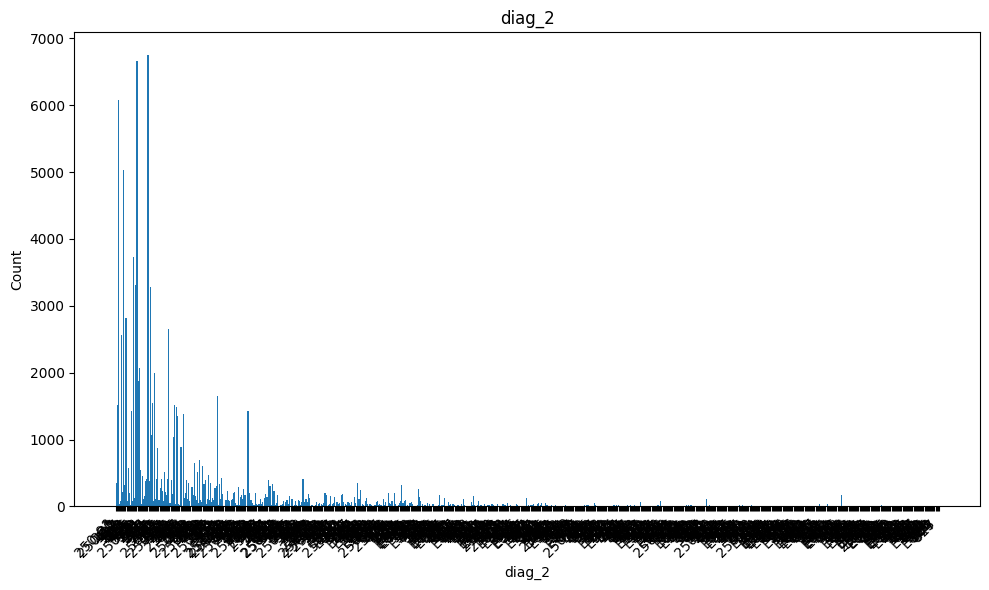

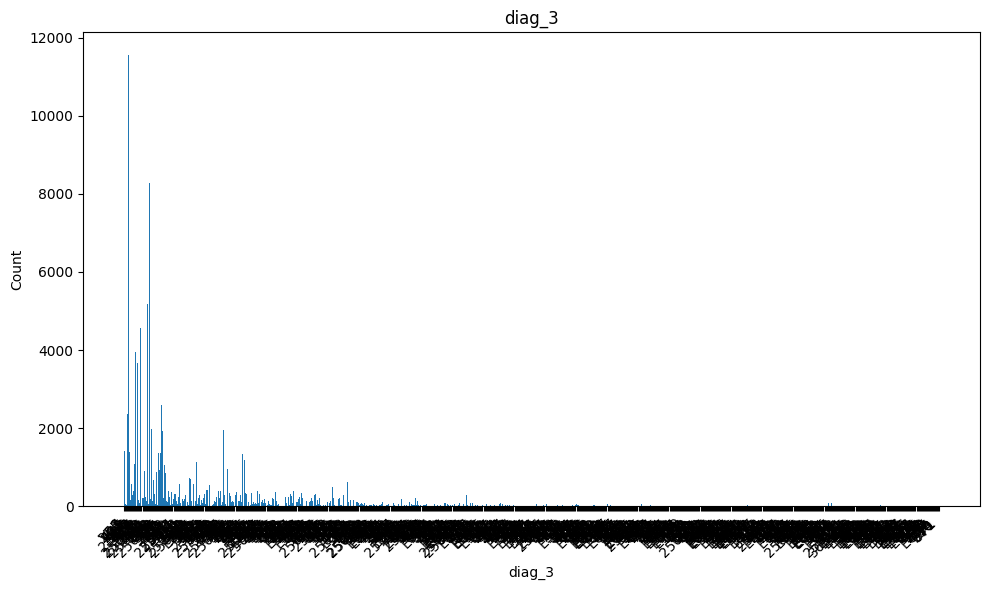

In [166]:
# prompt: Plot the historgram of race, diag_1, diag_2, and diag_3 in data. The title should be the feature name i.e. race or diag_1 or diag_2 or diag_3 and the x-axis is the unique value or string for which the count  is plotted on the y-axis

import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
for feature in ['race', 'diag_1', 'diag_2', 'diag_3']:
  plt.figure(figsize=(10, 6))
  plt.hist(data[feature], bins=data[feature].nunique())
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent overlapping labels
  plt.show()

### Observation
There are a lot of missing values in weight, payer_code and mecical_speciality features. So we drop these features and create a new dataset. We replace the missing values in diag_1, diag_2 and diag_3 with the most common diagnosis in that feature. This is evident from the histogram that there is predominantly a small set of diagnosis that is most common in the data. Also from the race histogram, it is evident that there is predominantly one race is the most common to the data.



In [167]:
# Drop weight, payer_code, and medical_speciality features
data = data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

In [168]:
rows = data.shape[0]
cols = data.shape[1]
print('#samples  (rows)    =  {}'.format(rows))
print('#features (columns) =  {}'.format(cols))

#samples  (rows)    =  101766
#features (columns) =  47


In [169]:
# Function to process a feature for a specific patient
def process_feature(patient_data, feature):
    unique_values = patient_data[feature].unique()
    non_missing_values = [val for val in unique_values if val != '?']

    if len(non_missing_values) == 0:
        # All values are '?', drop these records
        return None
    elif len(non_missing_values) == 1:
        # All non-missing values are the same, replace '?' with that value
        return non_missing_values[0]
    else:
        # Multiple different non-missing values, replace '?' with most common non-'?' value
        return patient_data[patient_data[feature] != '?'][feature].mode()[0]

In [170]:
# Process each feature containing '?'
for feature in ['race', 'diag_1', 'diag_2', 'diag_3']:
    # Get patient numbers with '?' in this feature
    patient_numbers = data[data[feature] == '?']['patient_nbr'].unique()

    print(f"Number of patients with '?' in {feature}: {len(patient_numbers)}")
    print(f"Patient numbers with '?' in in {feature}: {patient_numbers}")

    for patient_nbr in patient_numbers:
        patient_data = data[data['patient_nbr'] == patient_nbr]
        replacement_value = process_feature(patient_data, feature)

        if replacement_value is None:
            # Drop records where all values for this feature are '?'
            data = data[~((data['patient_nbr'] == patient_nbr) & (data[feature] == '?'))]
        else:
            # Replace '?' with the determined value
            data.loc[(data['patient_nbr'] == patient_nbr) & (data[feature] == '?'), feature] = replacement_value

# Verify that no '?' remains in the specified features
for feature in ['race', 'diag_1', 'diag_2', 'diag_3']:
    remaining_question_marks = data[data[feature] == '?']
    if len(remaining_question_marks) > 0:
        print(f"Remaining '?' in {feature}: {len(remaining_question_marks)}")
    else:
        print(f"No '?' remaining in {feature}")


Number of patients with '?' in race: 1977
Patient numbers with '?' in in race: [ 69422211  22864131  21239181 ... 151756061 147936164 178662695]
Number of patients with '?' in diag_1: 20
Patient numbers with '?' in in diag_1: [  1355697   9946782    520452   3650130    916947   4232736 104694696
  23460408  25300467  59039082  41539860  27758448  39688524  59785542
  23657589  24668415  36672786 113173146   6734736  39433527]
Number of patients with '?' in diag_2: 328
Patient numbers with '?' in in diag_2: [  8222157   3376278   2359485   3425292   4893183   9029196   4688325
   6325848   1070622   6150186  11802555   9043173  10192887   4272444
  63934866   5411700   6884595   5945526  58242528  14310990    287640
  14532273   4117221  67749030   5765544   5236596   1498896  14691519
  15829983  15957432  16195455   3148857  16388955  16336188  16647354
  17048097 112354299   3301893   1266678  17806437   1391247  18065367
  17994051   1450701   1386945  17596530  18055827  76476168  

In [171]:
rows = data.shape[0]
cols = data.shape[1]
print('#samples  (rows)    =  {}'.format(rows))
print('#features (columns) =  {}'.format(cols))

#samples  (rows)    =  98578
#features (columns) =  47


In [172]:
# Display the first few rows of the new dataset
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [173]:
# Print the data types dtypes
print("\nData types:\n", data.dtypes)


Data types:
 encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glybur

In [174]:
check_missing_values(data)

encounter_id,	 0,	 0.00%
patient_nbr,	 0,	 0.00%
race,	 0,	 0.00%
gender,	 0,	 0.00%
age,	 0,	 0.00%
admission_type_id,	 0,	 0.00%
discharge_disposition_id,	 0,	 0.00%
admission_source_id,	 0,	 0.00%
time_in_hospital,	 0,	 0.00%
num_lab_procedures,	 0,	 0.00%
num_procedures,	 0,	 0.00%
num_medications,	 0,	 0.00%
number_outpatient,	 0,	 0.00%
number_emergency,	 0,	 0.00%
number_inpatient,	 0,	 0.00%
diag_1,	 0,	 0.00%
diag_2,	 0,	 0.00%
diag_3,	 0,	 0.00%
number_diagnoses,	 0,	 0.00%
max_glu_serum,	 0,	 0.00%
A1Cresult,	 0,	 0.00%
metformin,	 0,	 0.00%
repaglinide,	 0,	 0.00%
nateglinide,	 0,	 0.00%
chlorpropamide,	 0,	 0.00%
glimepiride,	 0,	 0.00%
acetohexamide,	 0,	 0.00%
glipizide,	 0,	 0.00%
glyburide,	 0,	 0.00%
tolbutamide,	 0,	 0.00%
pioglitazone,	 0,	 0.00%
rosiglitazone,	 0,	 0.00%
acarbose,	 0,	 0.00%
miglitol,	 0,	 0.00%
troglitazone,	 0,	 0.00%
tolazamide,	 0,	 0.00%
examide,	 0,	 0.00%
citoglipton,	 0,	 0.00%
insulin,	 0,	 0.00%
glyburide-metformin,	 0,	 0.00%
glipizide-m

In [175]:
get_unique_values(data)

Unique values of encounter_id: [   149190     64410    500364 ... 443854148 443857166 443867222]
Unique values of patient_nbr: [ 55629189  86047875  82442376 ... 140199494 120975314 175429310]
Unique values of race: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Unique values of gender: ['Female' 'Male' 'Unknown/Invalid']
Unique values of age: ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
Unique values of admission_type_id: [1 2 3 6 4 5 8 7]
Unique values of discharge_disposition_id: [ 1  3  6  2  5 11  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Unique values of admission_source_id: [ 7  2  4  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
Unique values of time_in_hospital: [ 3  2  1  4  5 13 12  9  7 10 11  6  8 14]
Unique values of num_lab_procedures: [ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  19  64  25  53  52  87  27  37  46  41  28  36  48  72  10   2  65
  67  40

In [178]:
# Check features that have NULL values
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               93335
A1Cresult                   82304
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [179]:
# Replace null values with 'None' in max_glu_serum and A1Cresult
data['max_glu_serum'] = data['max_glu_serum'].fillna('None')
data['A1Cresult'] = data['A1Cresult'].fillna('None')

# Check if there are any remaining null values in the entire dataset
null_counts = data.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

if null_counts.sum() == 0:
    print("\nAll null values have been successfully replaced.")
else:
    print("\nThere are still some null values in the dataset.")

Columns with null values:
Series([], dtype: int64)

All null values have been successfully replaced.


In [180]:
# Display unique values in these columns to confirm 'None' is present
print("\nUnique values in max_glu_serum:", data['max_glu_serum'].unique())
print("Unique values in A1Cresult:", data['A1Cresult'].unique())


Unique values in max_glu_serum: ['None' '>300' 'Norm' '>200']
Unique values in A1Cresult: ['None' '>7' '>8' 'Norm']


### Per encounter based parameters for a patient
Encounter ID Numeric Unique identifier of an encounter

*   Number of lab procedures(num_lab_procedures): Number of lab tests performed during the encounter
*   Number of procedures(num_procedures): Number of procedures (other than lab tests) performed during the encounter
*   Number of medications (num_medications): Number of distinct generic names administered during the encounter.
*   Number of outpatient visits(number_outpatient): Number of outpatient visits of the patient in the year preceding the encounter
*   Number of emergency visits (number_emergency): Number of emergency visits of the patient in the year preceding the encounter
*   Number of inpatient visits(number_inpatient): Number of inpatient visits of the patient in the year preceding the encounter
* metformin: ['No' 'Steady' 'Up' 'Down']
* repaglinide: ['No' 'Up' 'Steady' 'Down']
* nateglinide: ['No' 'Steady' 'Down' 'Up']
* chlorpropamide: ['No' 'Steady' 'Down' 'Up']
* glimepiride: ['No' 'Steady' 'Down' 'Up']
* acetohexamide: ['No' 'Steady']
* lipizide: ['No' 'Steady' 'Up' 'Down']
* glyburide: ['No' 'Steady' 'Up' 'Down']
* tolbutamide: ['No' 'Steady']
* pioglitazone: ['No' 'Steady' 'Up' 'Down']
* rosiglitazone: ['No' 'Steady' 'Up' 'Down']
* acarbose: ['No' 'Steady' 'Up' 'Down']
* miglitol: ['No' 'Steady' 'Down' 'Up']
* troglitazone: ['No' 'Steady']
* tolazamide: ['No' 'Steady' 'Up']
* examide: ['No']
* citoglipton: ['No']
* insulin: ['No' 'Up' 'Steady' 'Down']
* glyburide-metformin: ['No' 'Steady' 'Down' 'Up']
* glipizide-metformin: ['No' 'Steady']
* glimepiride-pioglitazone: ['No' 'Steady']
* metformin-rosiglitazone: ['No' 'Steady']
* metformin-pioglitazone: ['No' 'Steady']

For the generic names: metformin, repaglinide, nateglinide, chlorpropamide,
glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone,
rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin,
glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone,
metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether
the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage
was increased during the encounter, “down” if the dosage was decreased, “steady” if the
dosage did not change, and “no” if the drug was not prescribed





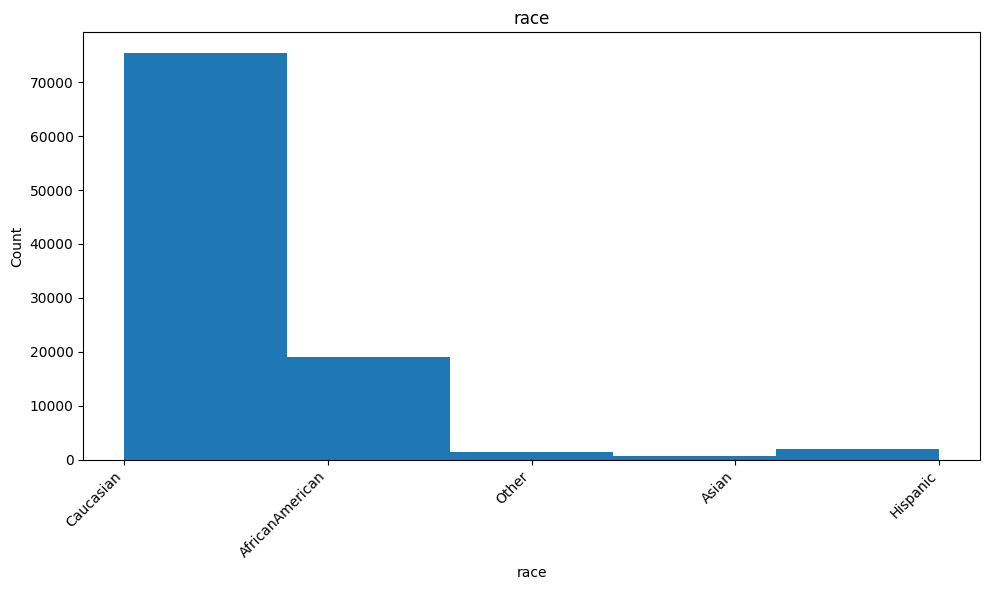

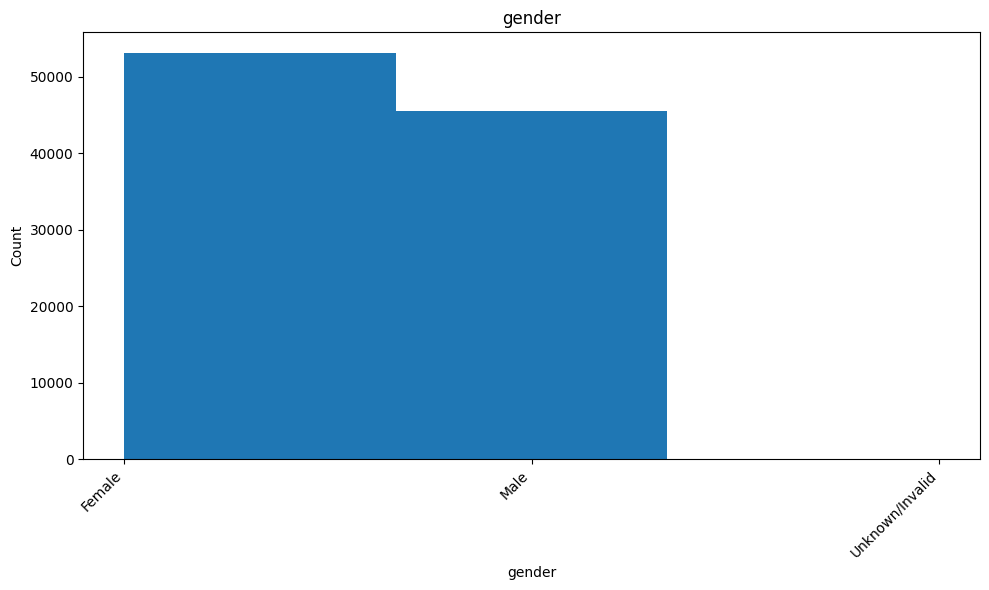

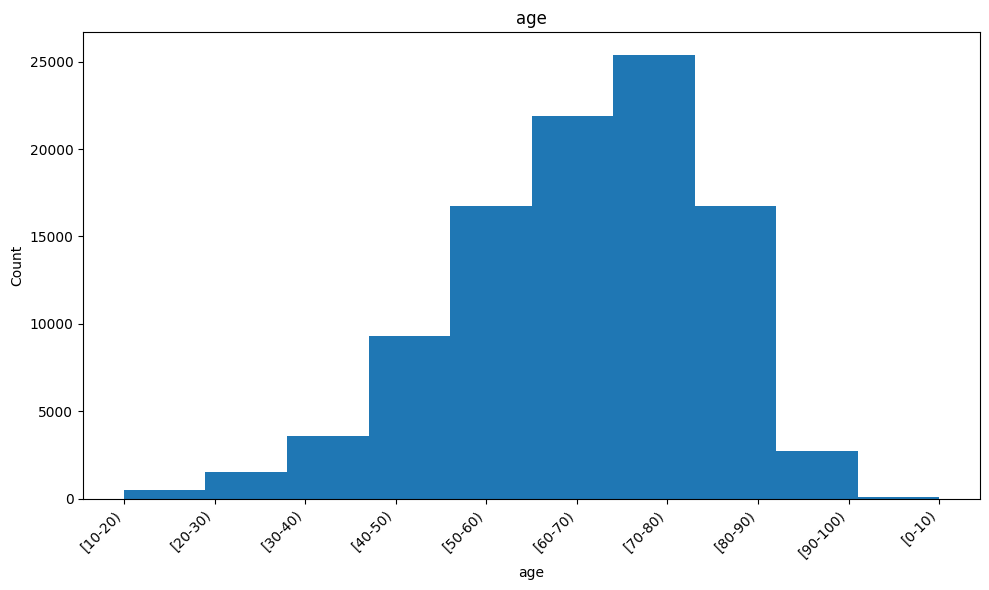

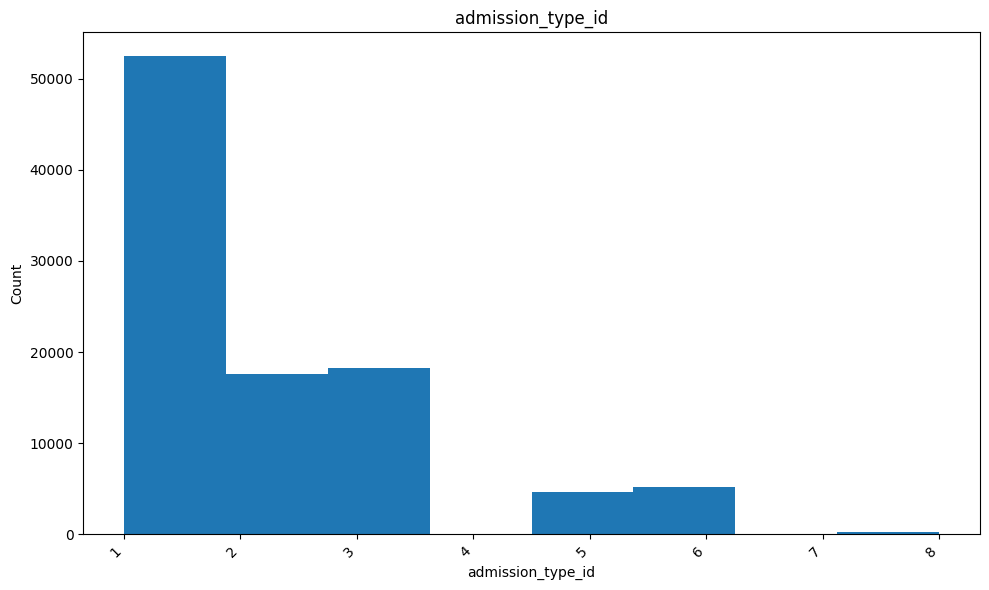

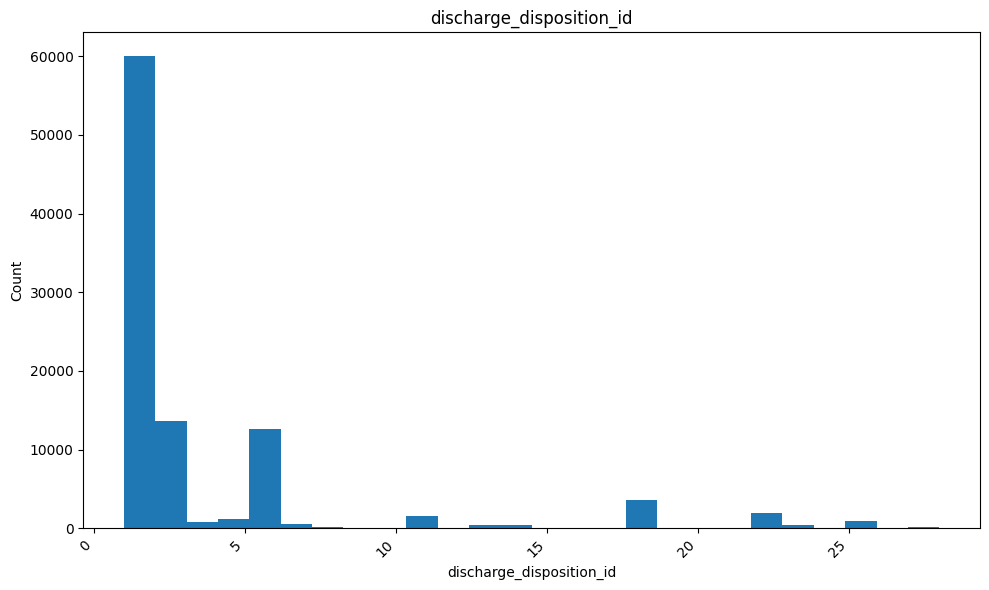

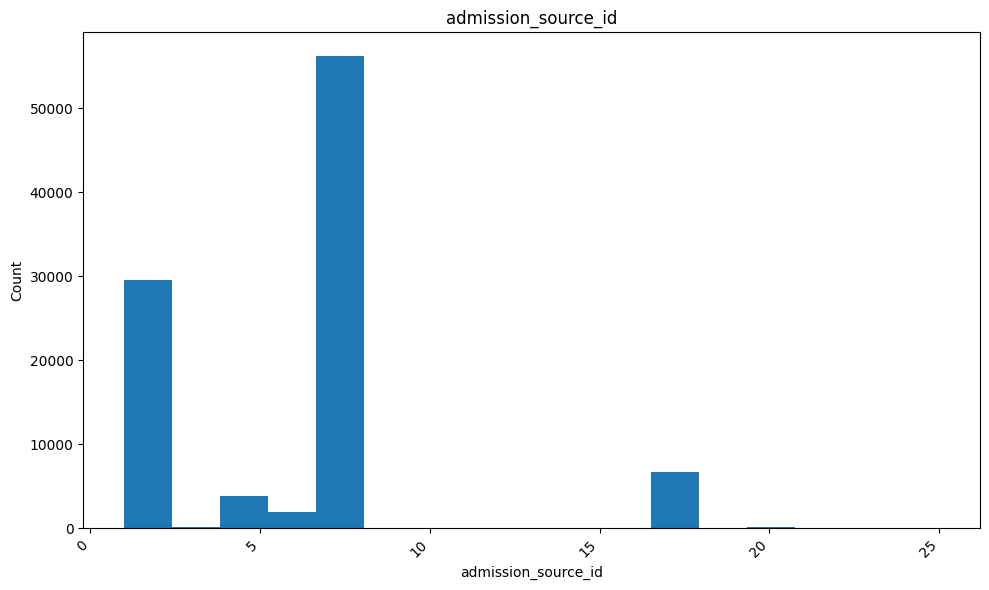

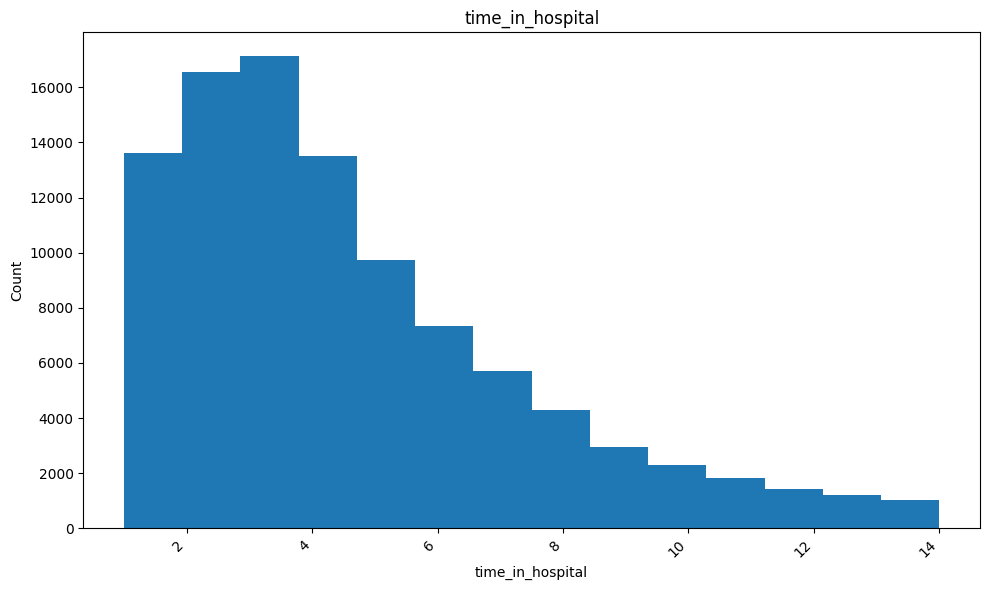

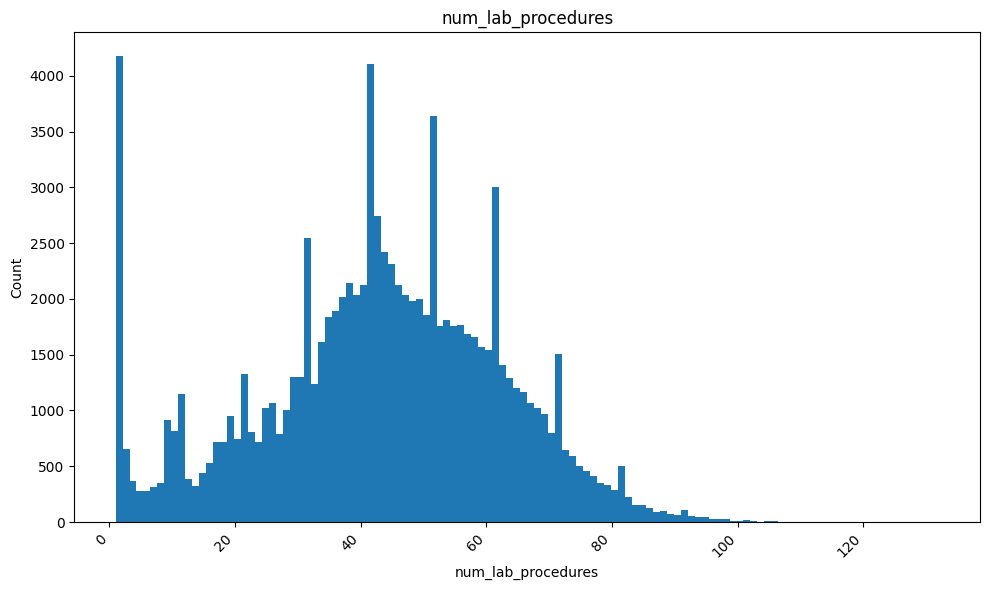

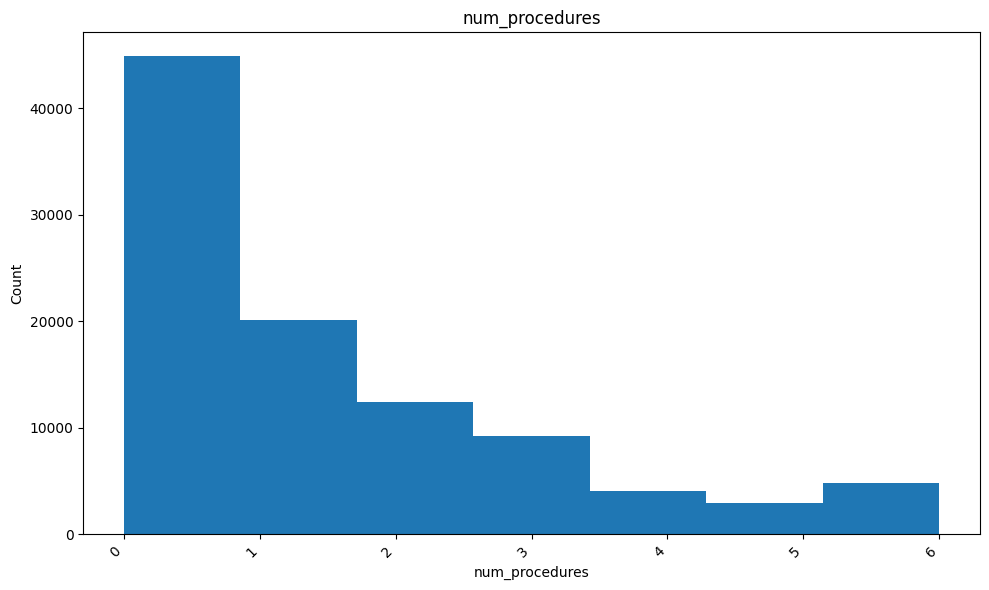

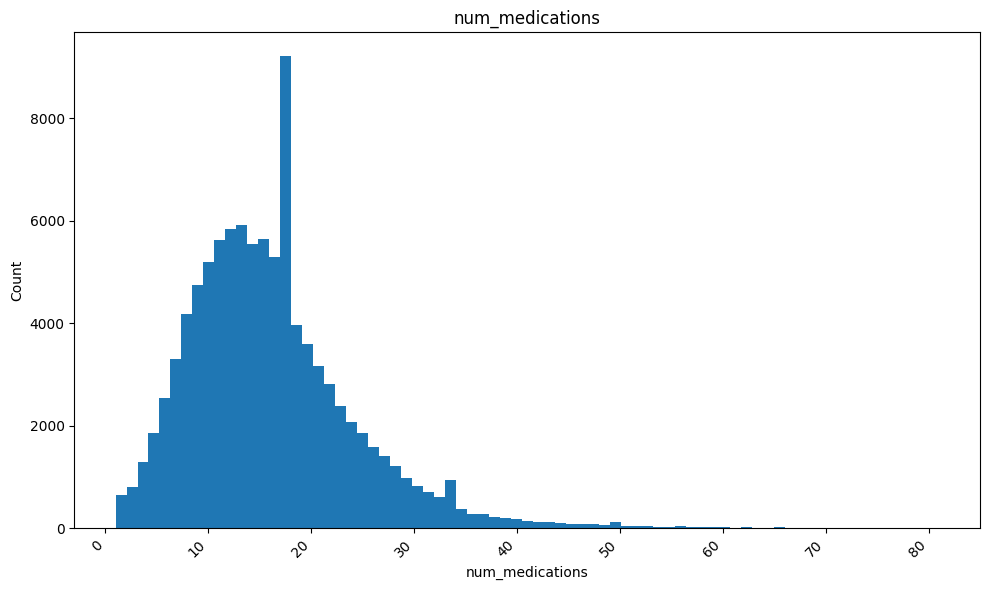

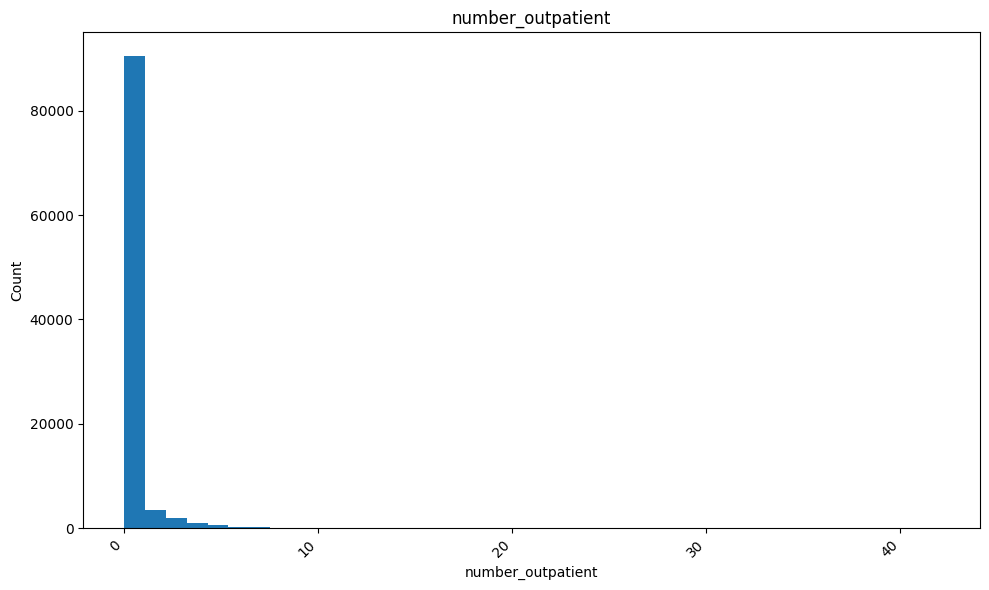

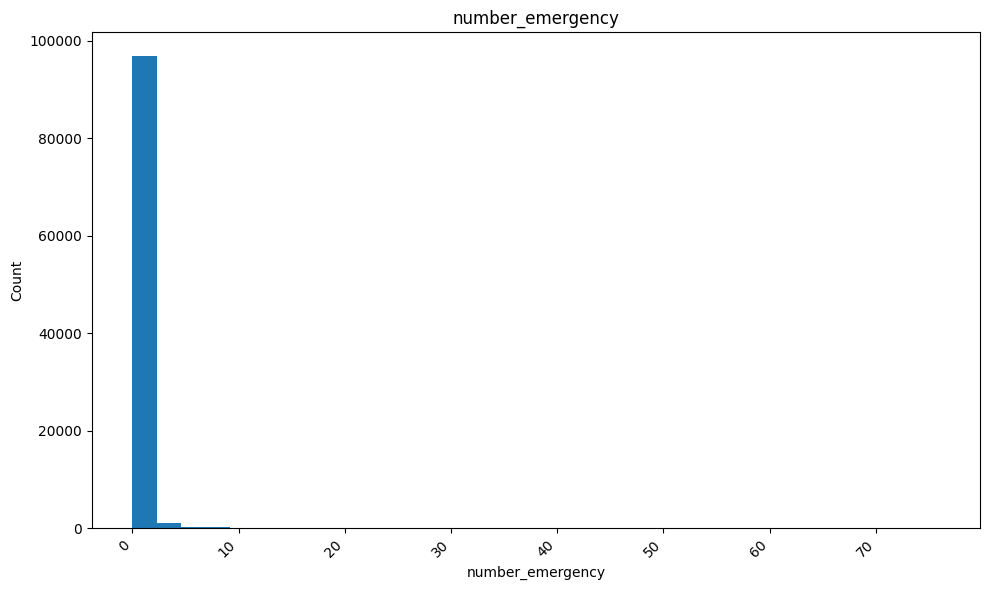

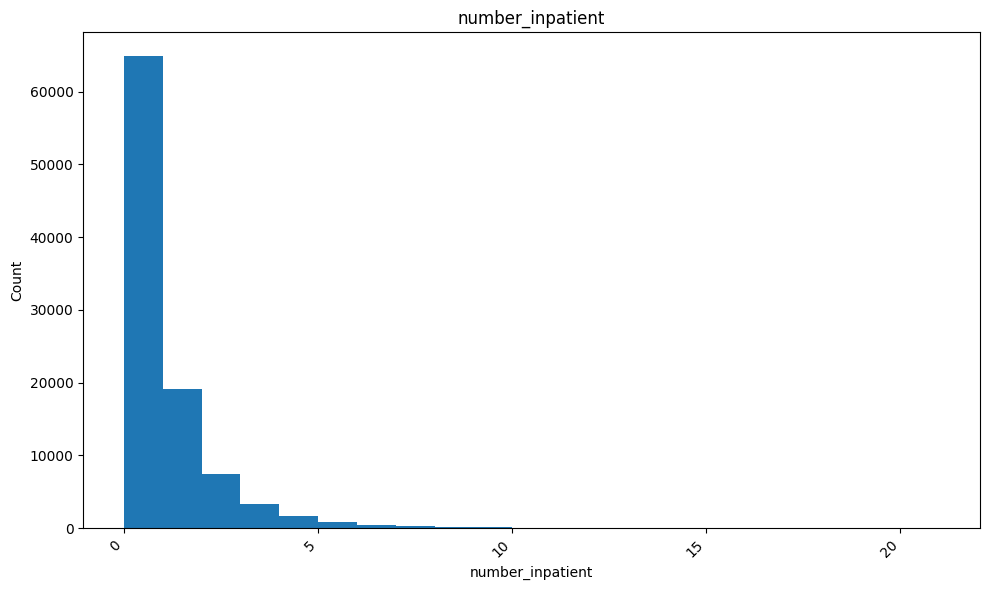

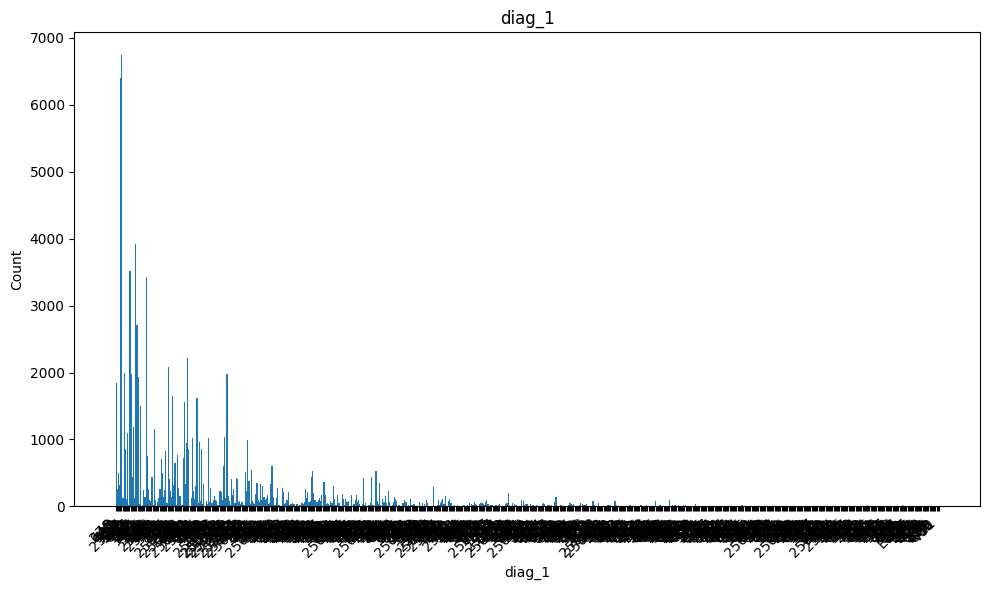

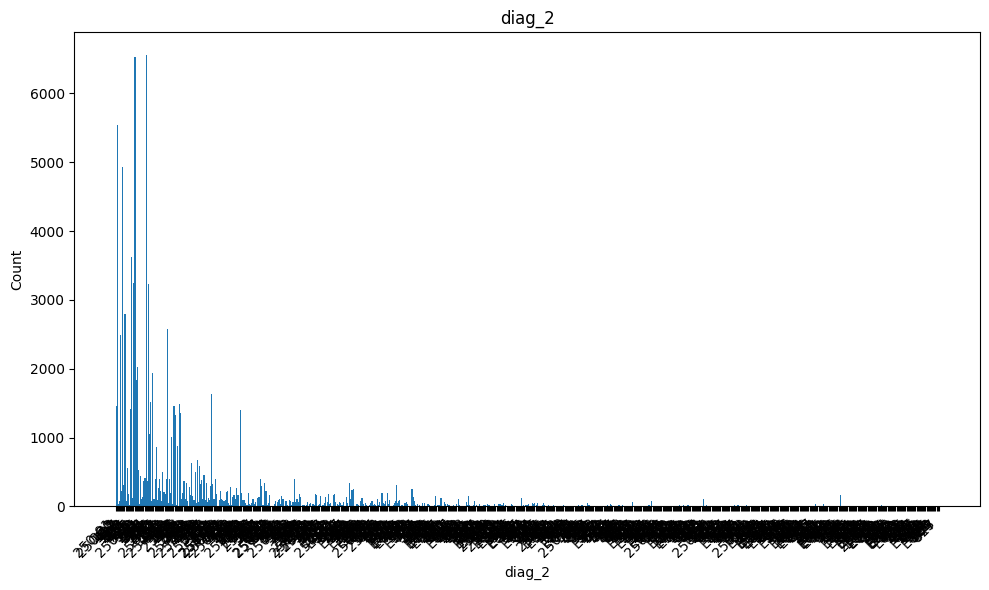

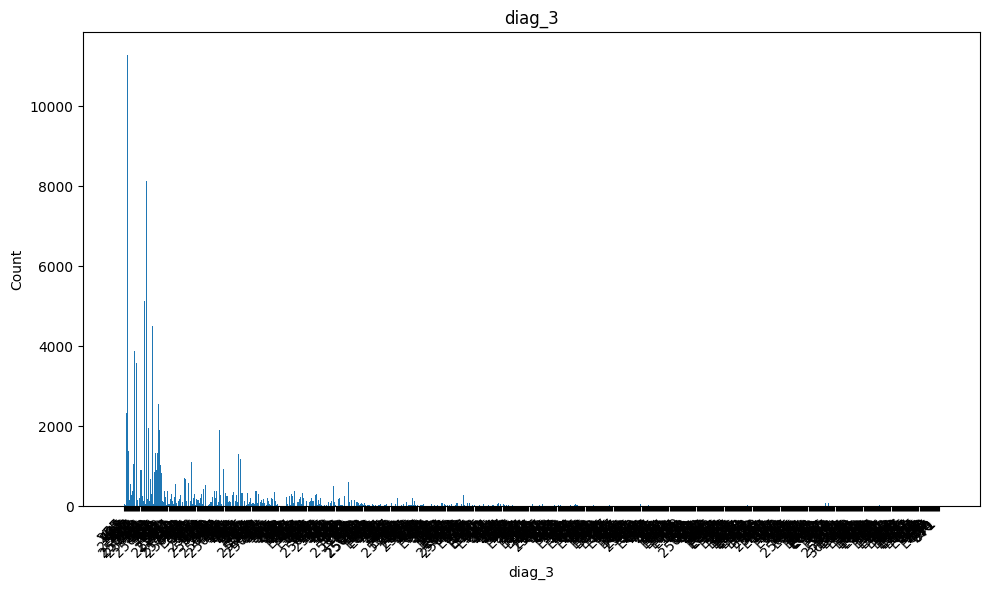

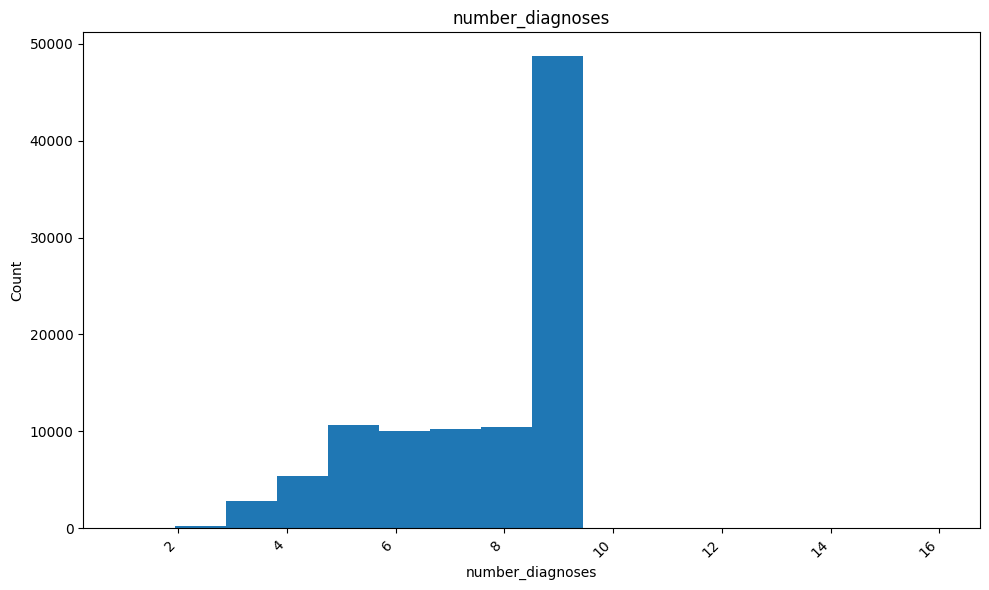

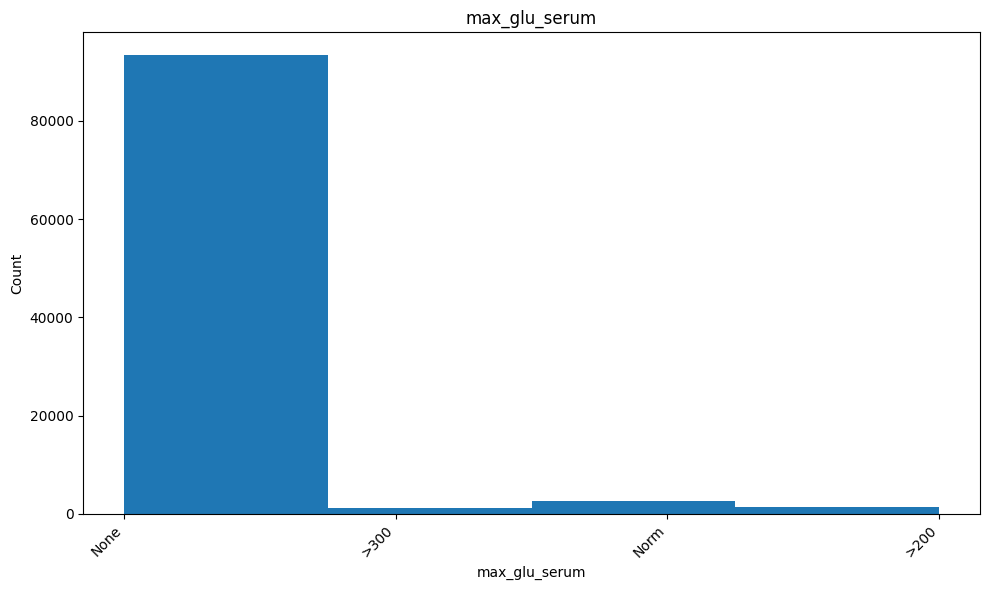

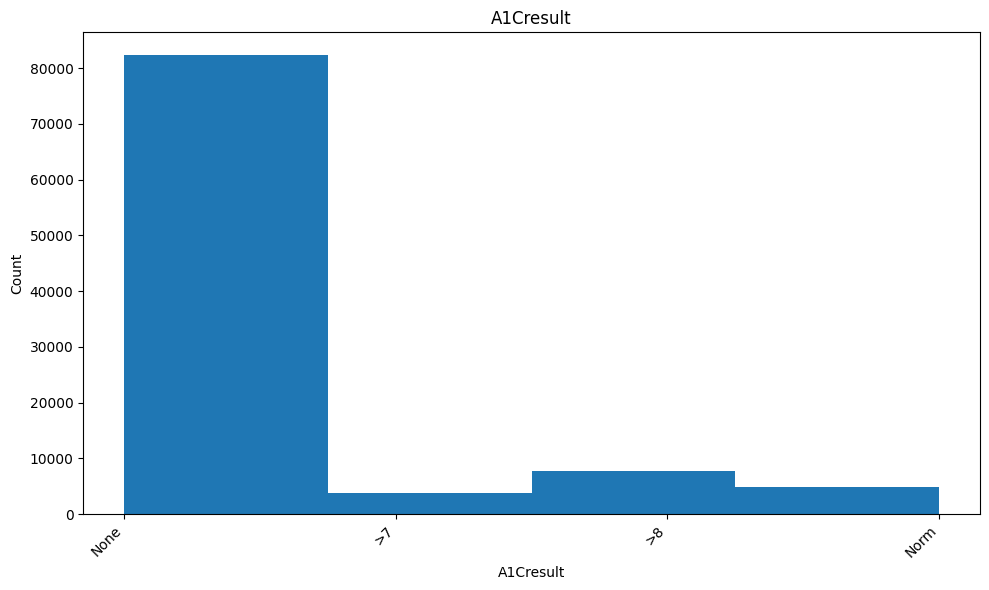

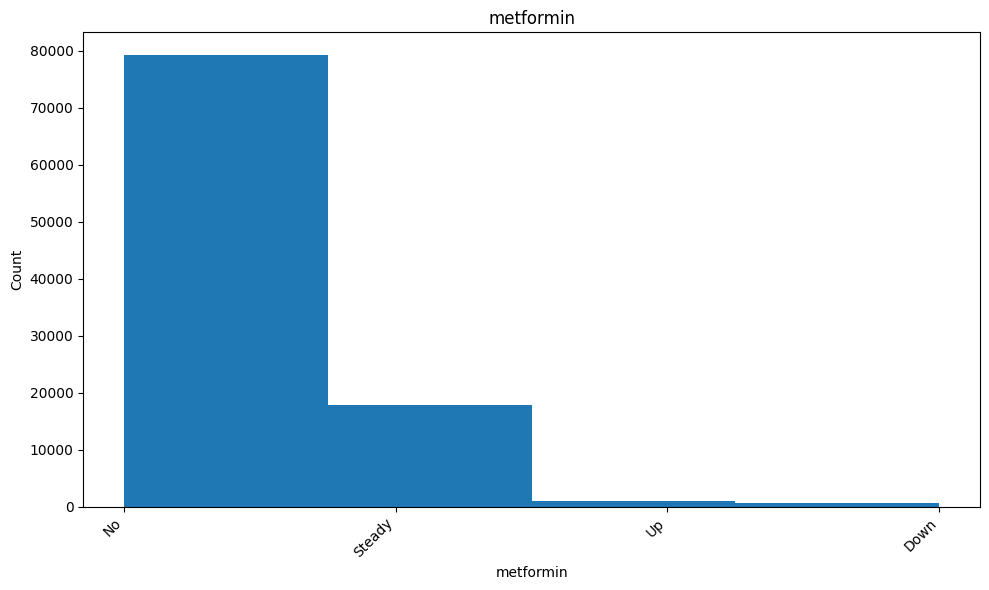

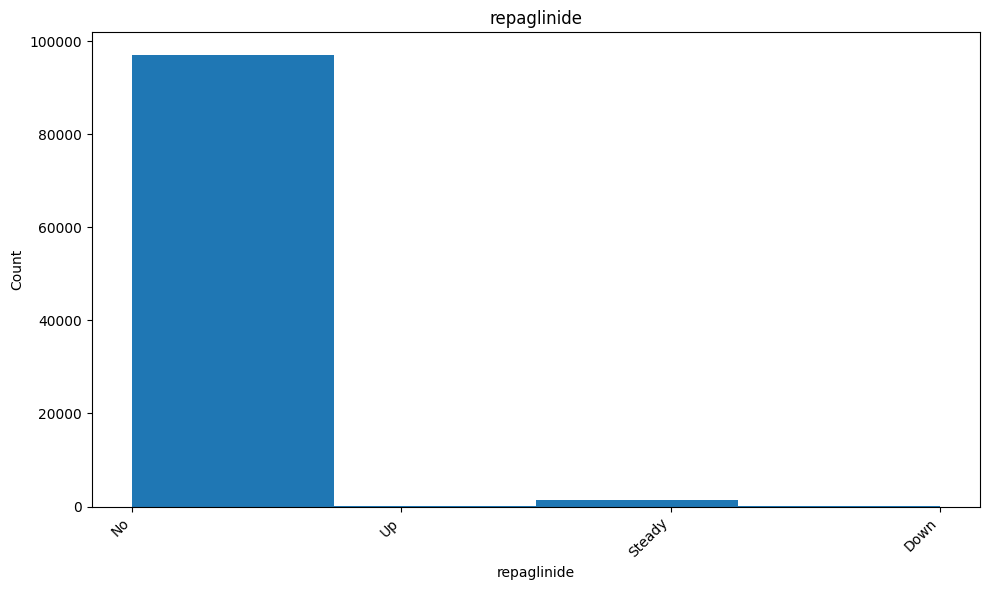

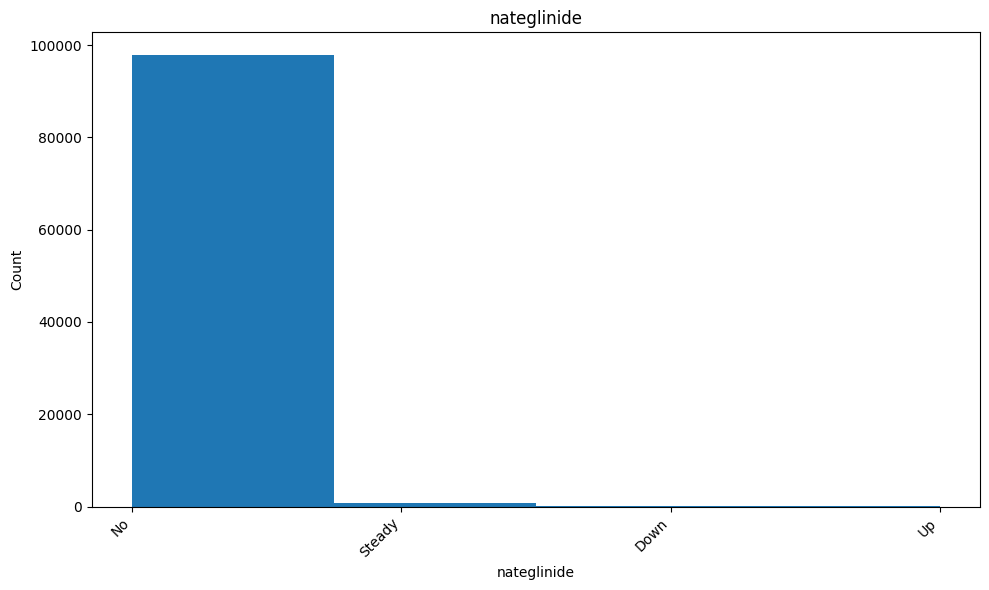

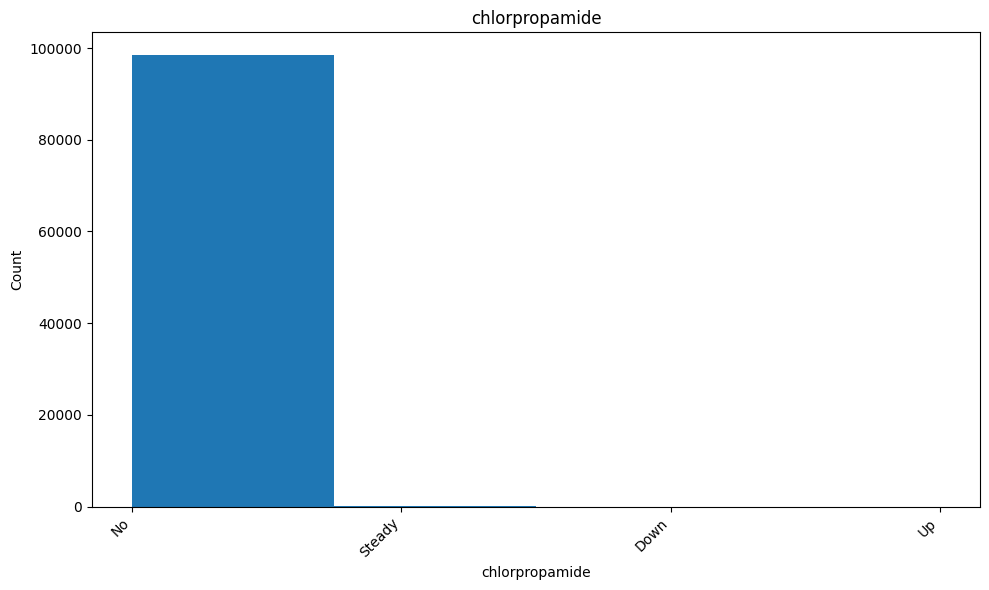

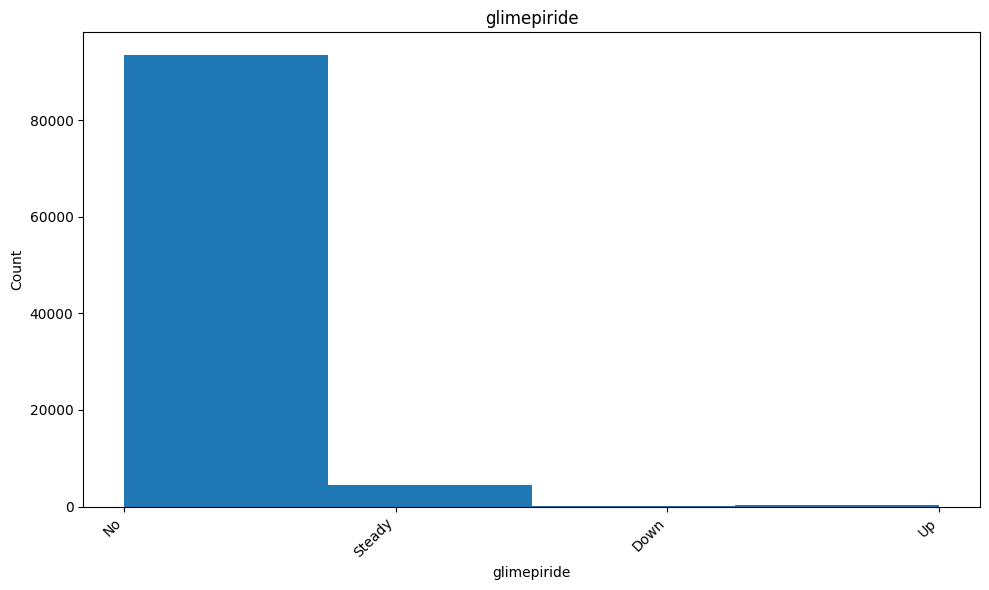

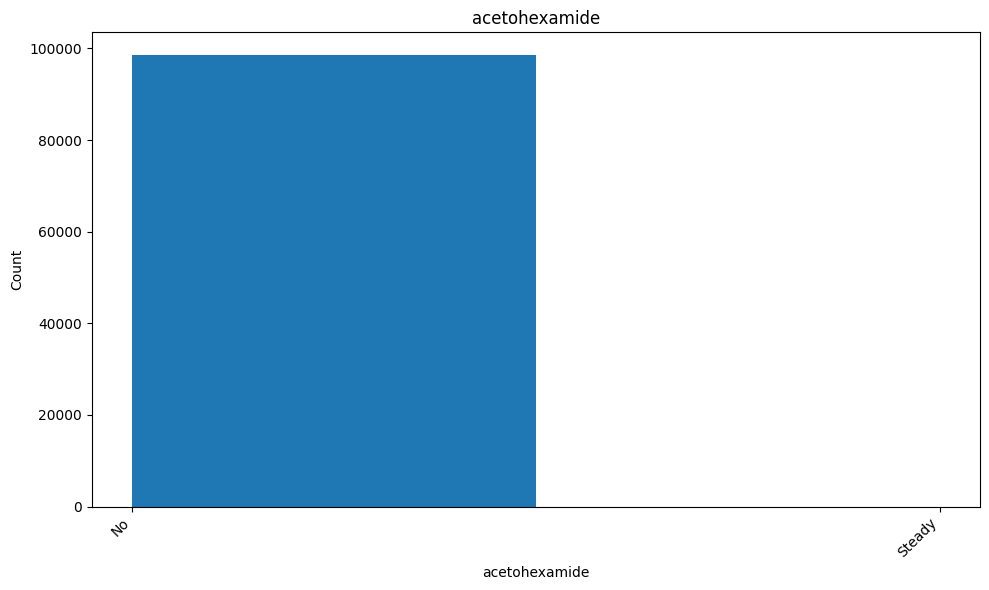

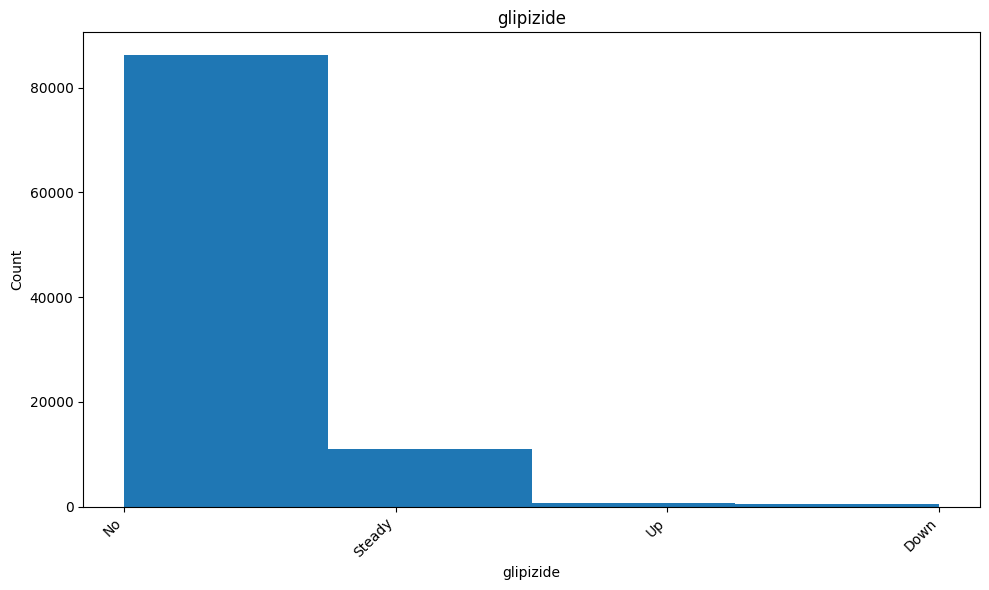

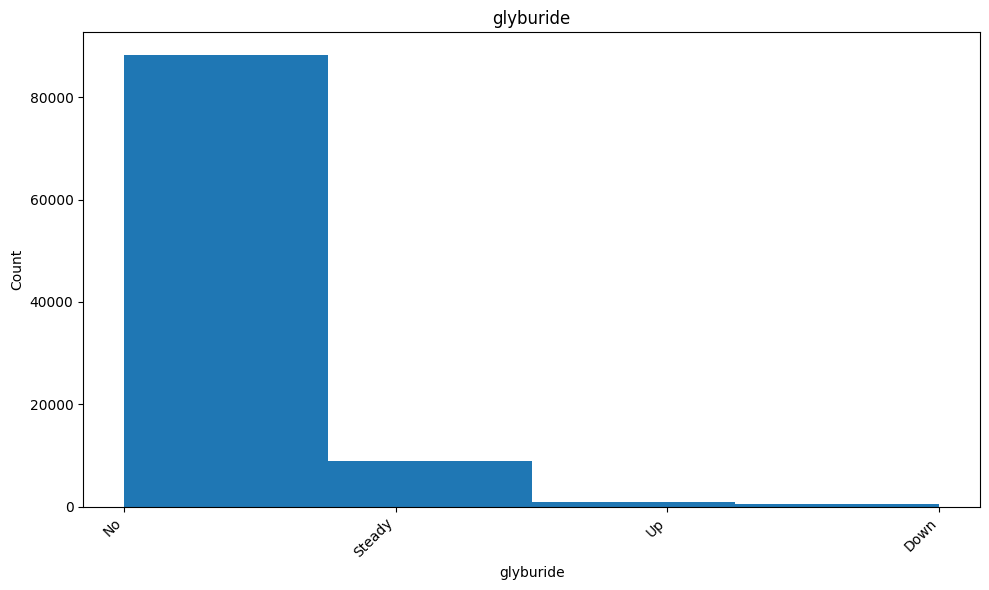

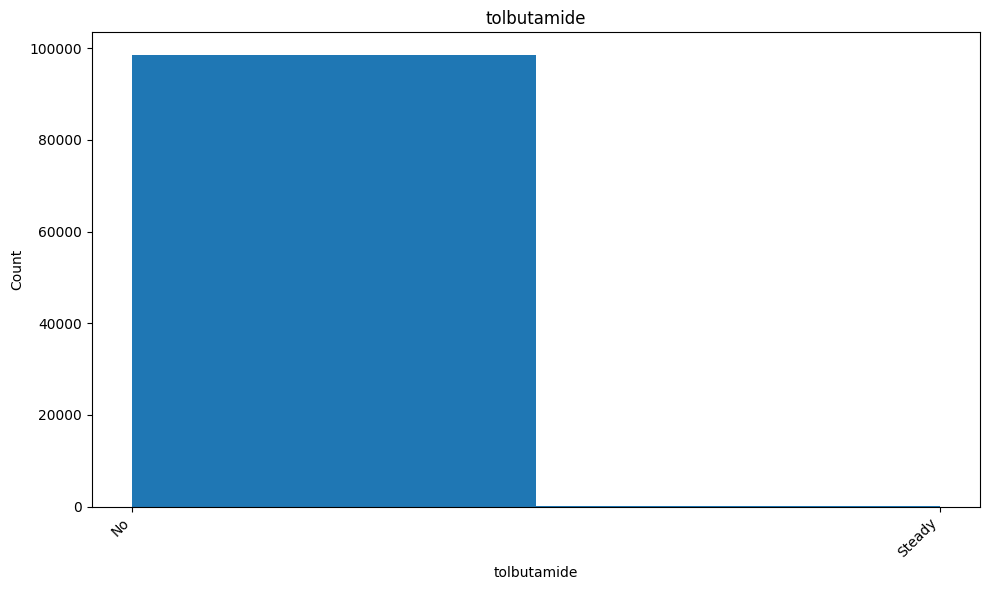

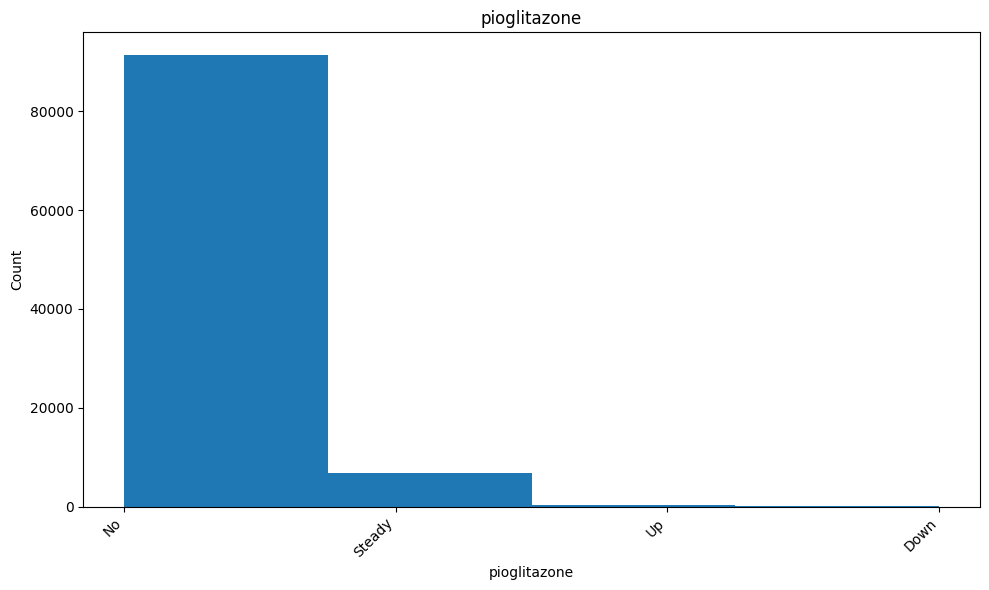

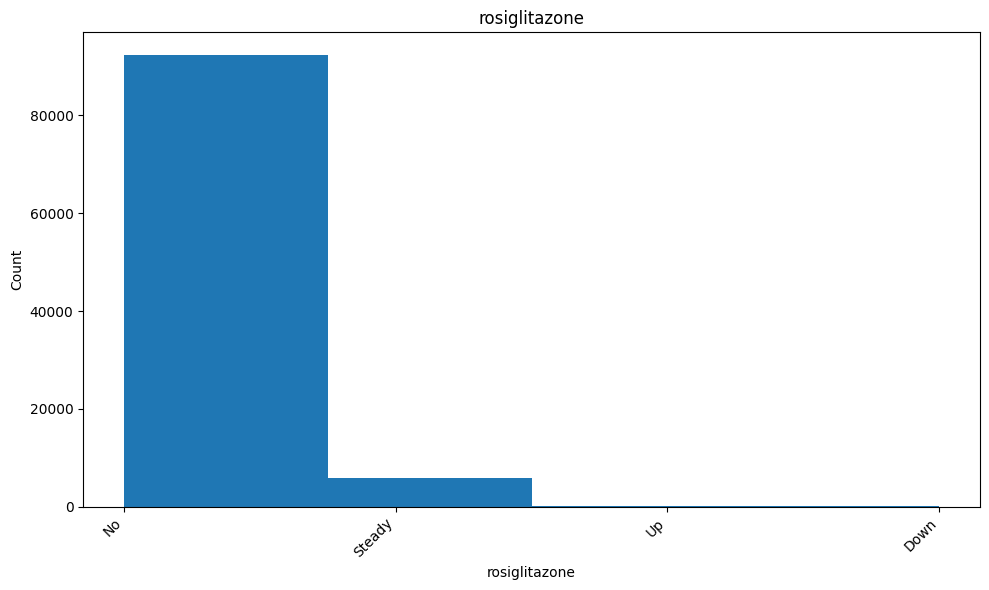

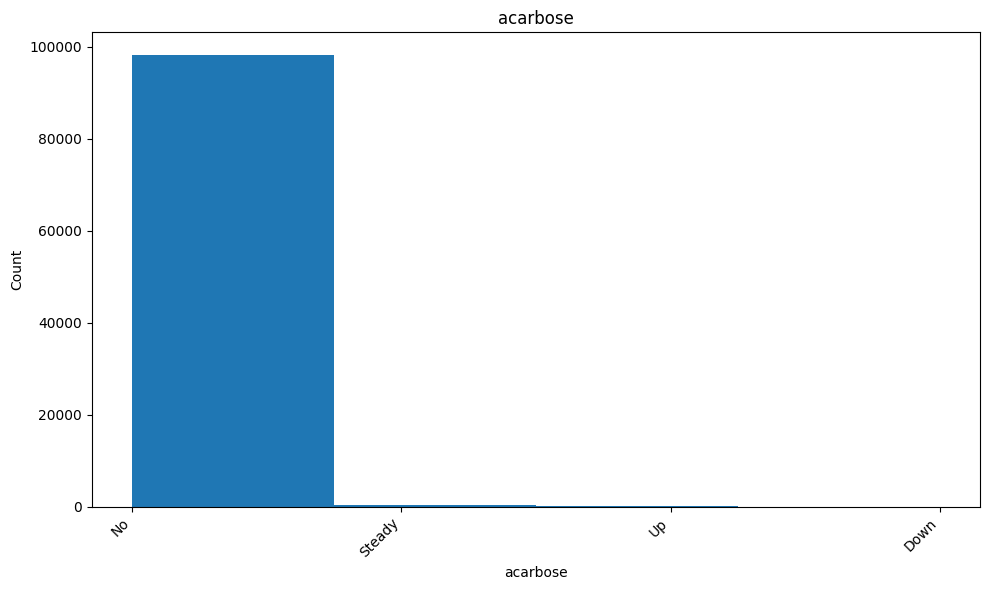

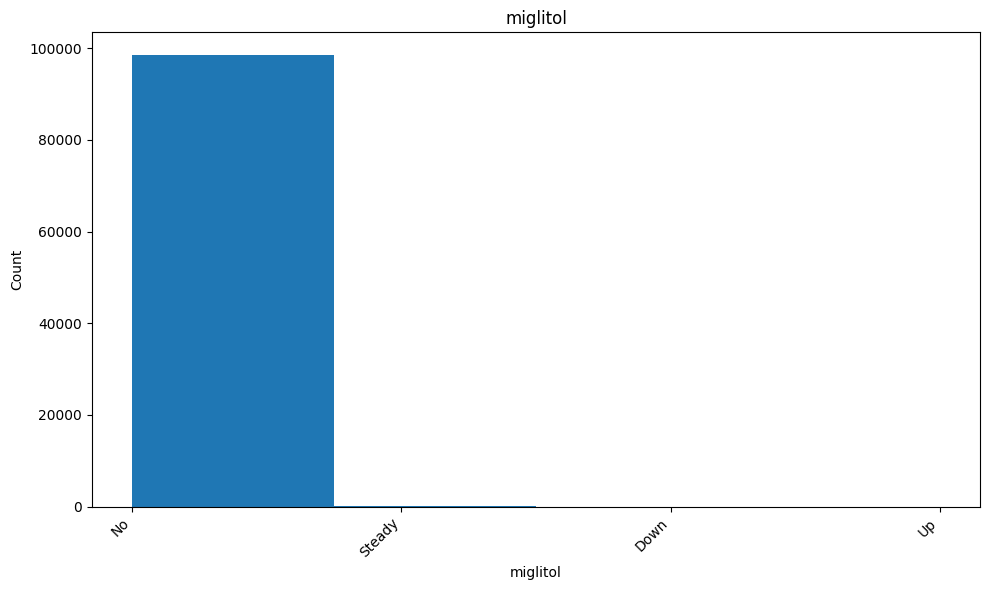

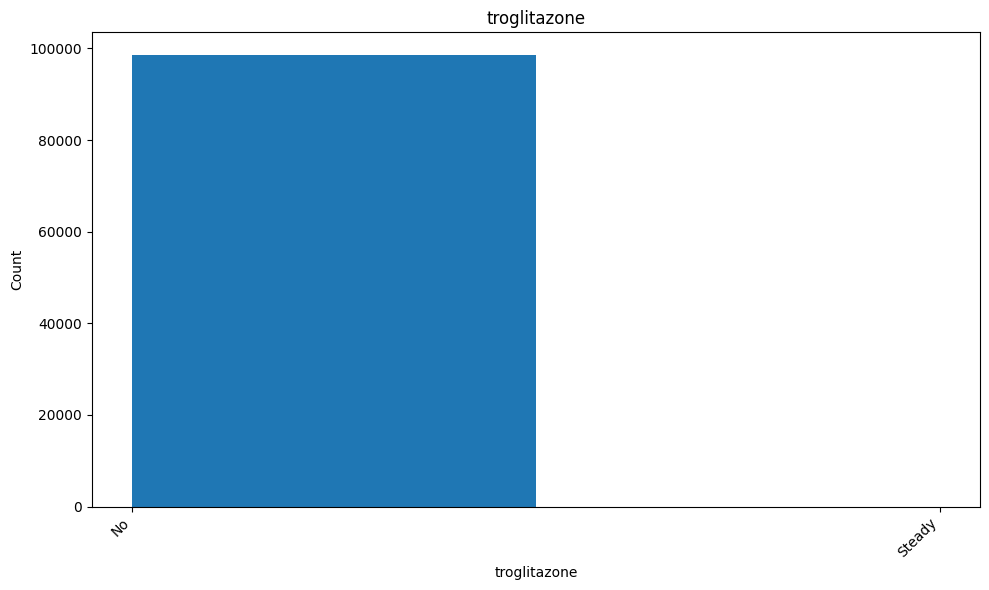

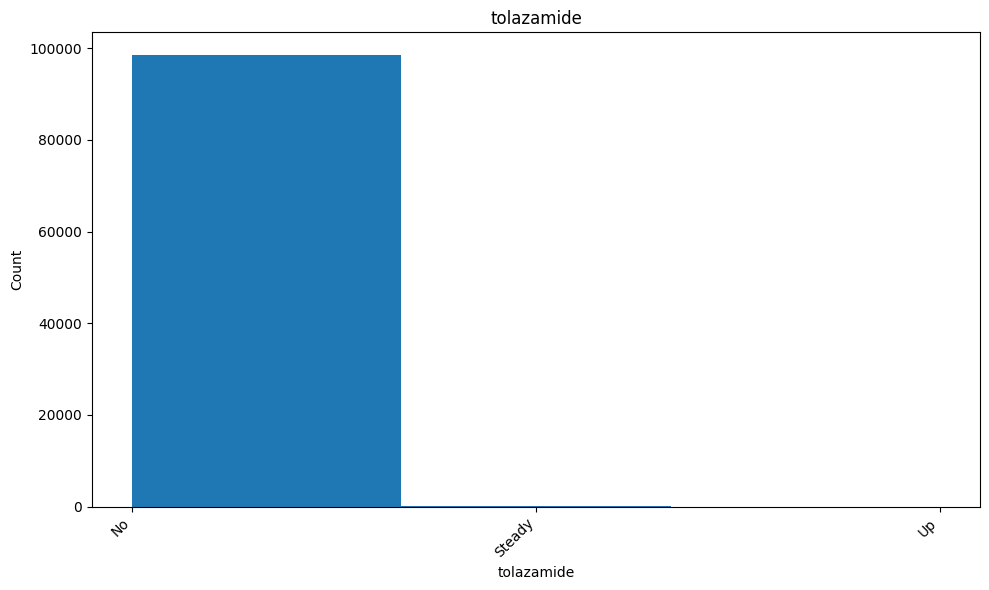

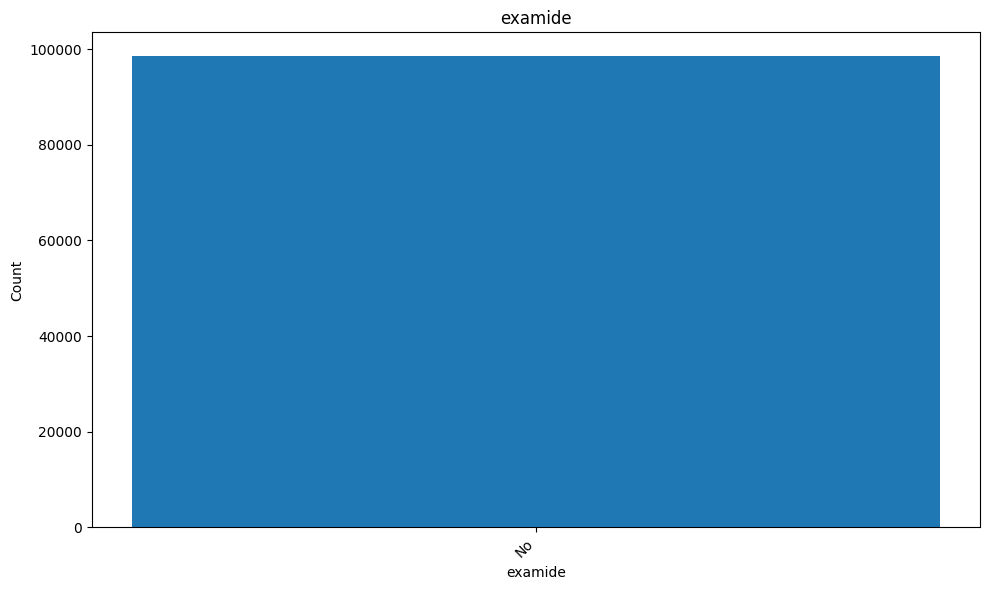

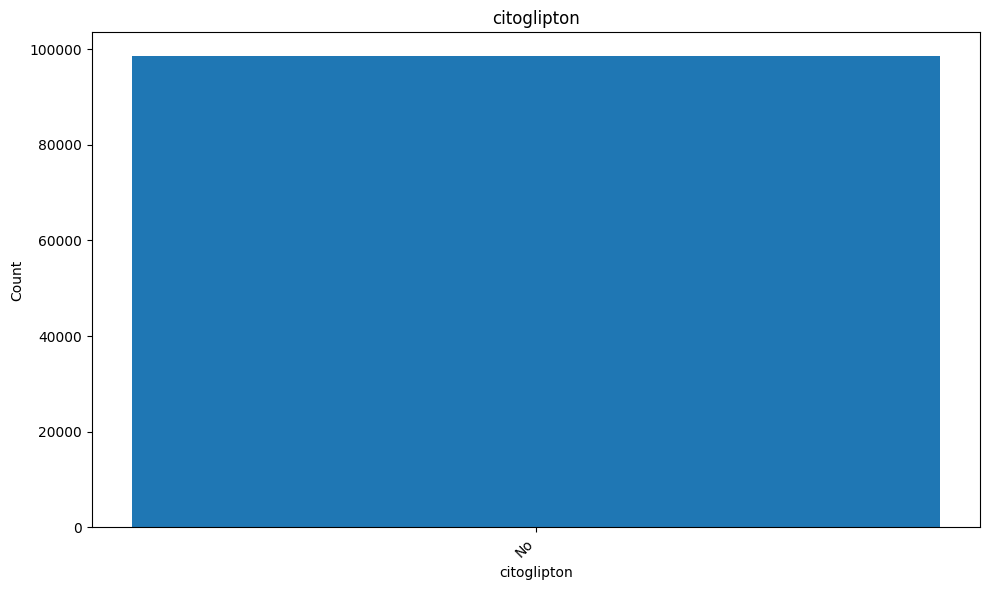

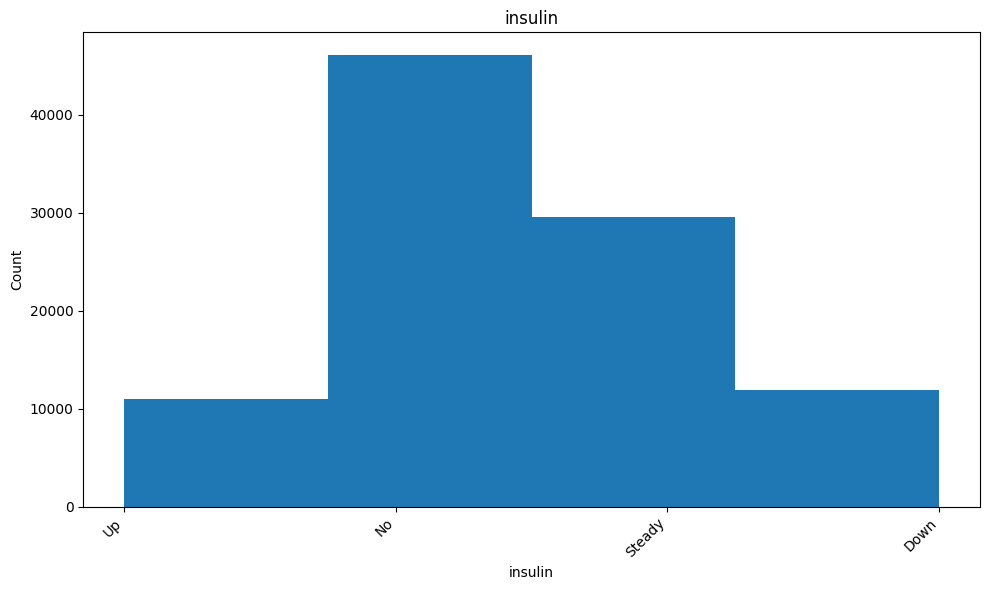

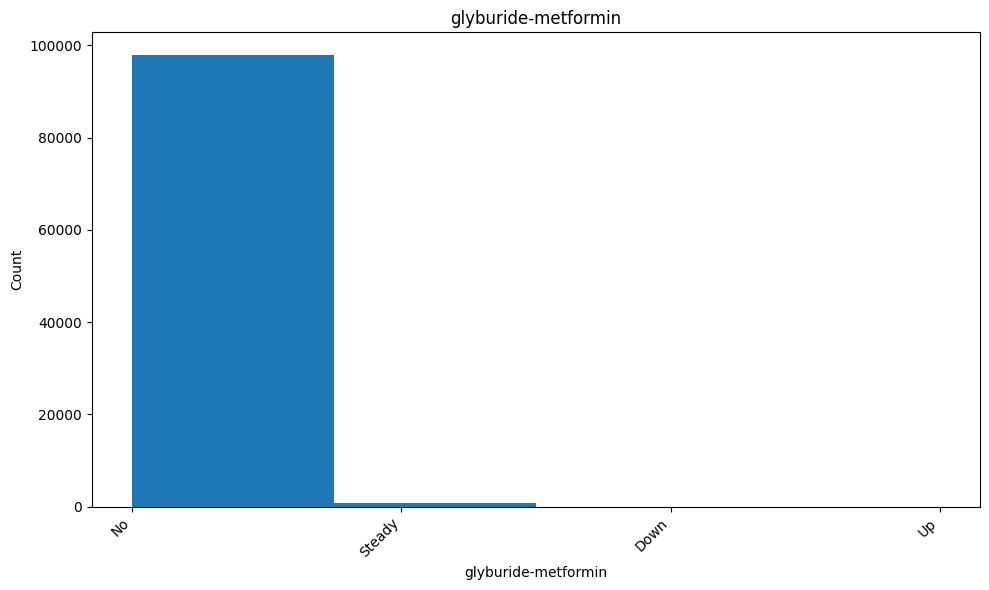

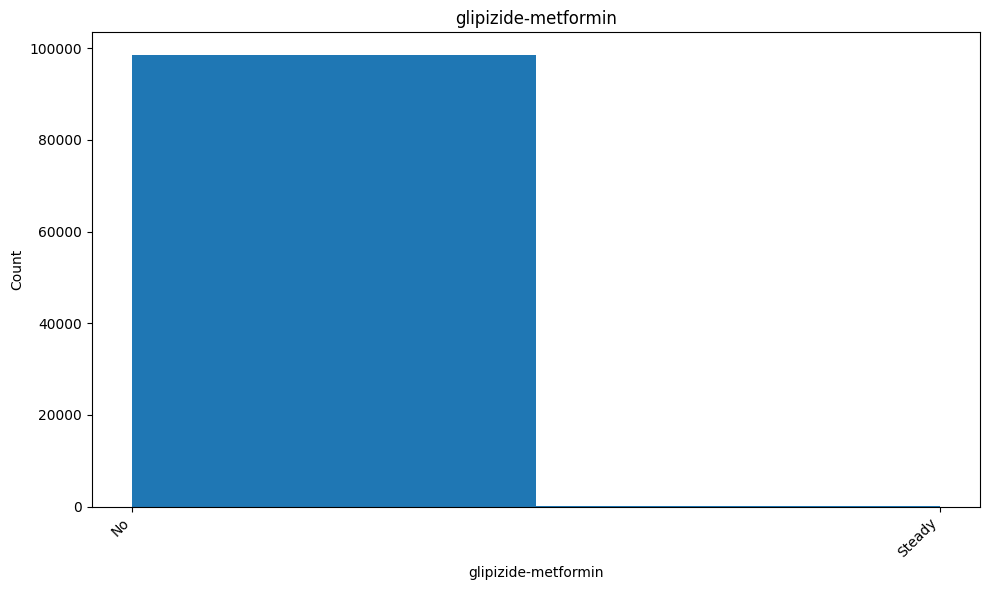

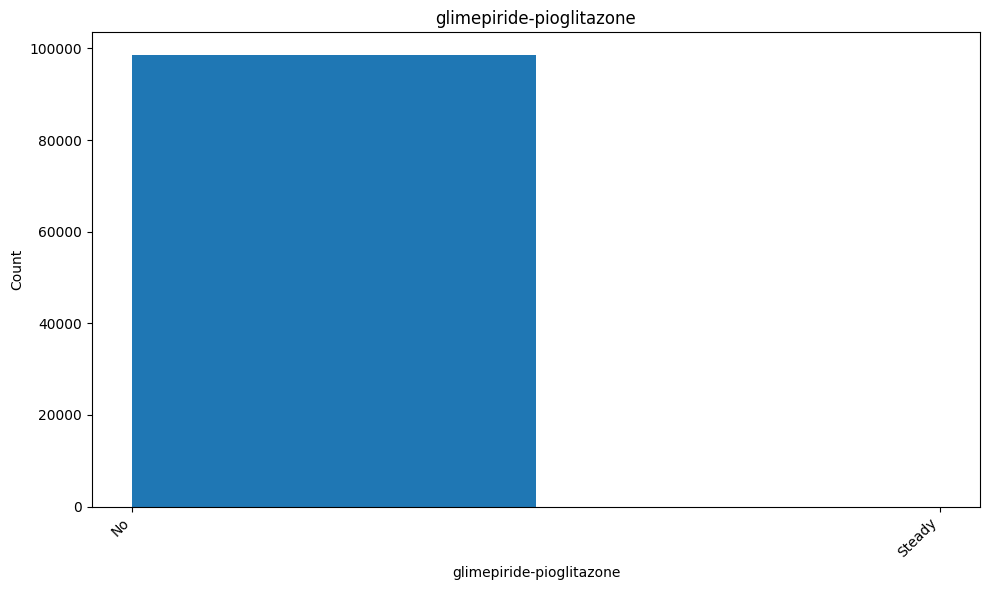

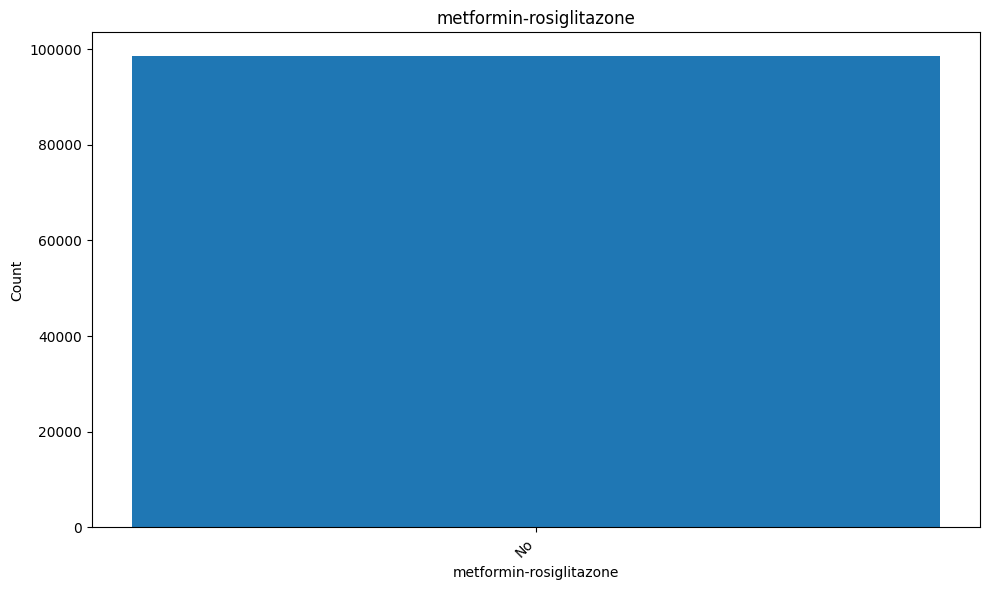

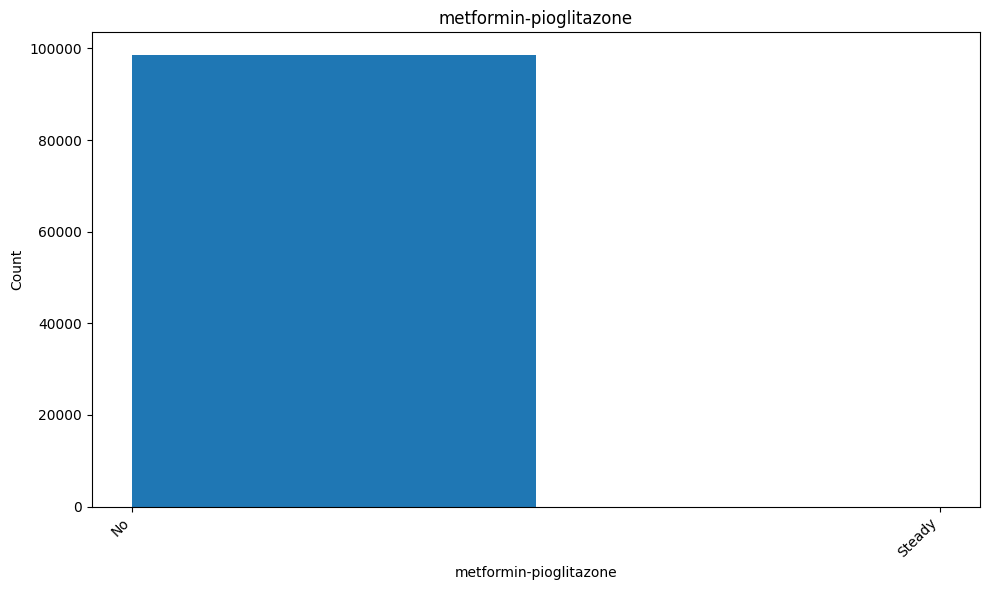

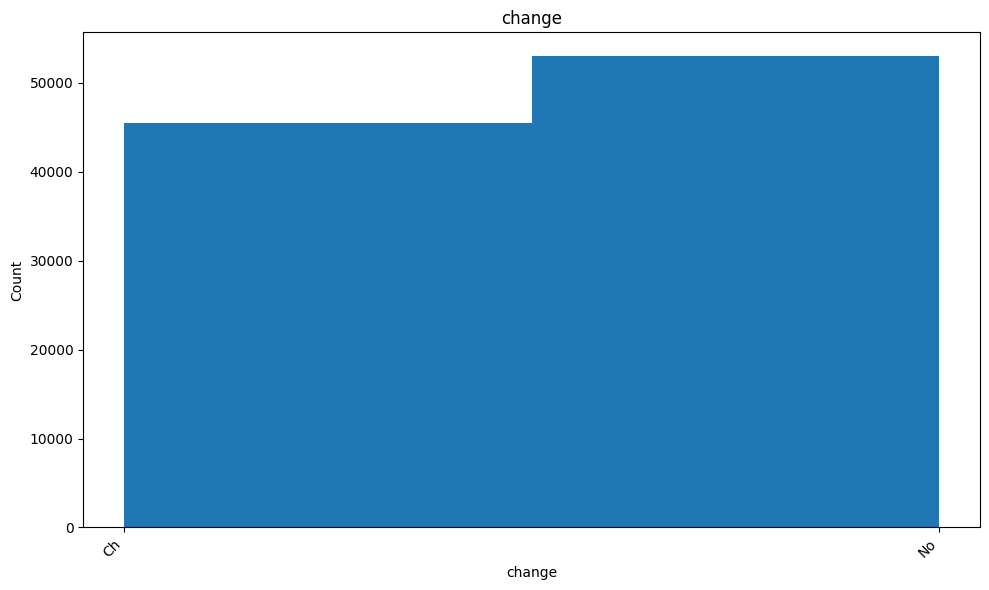

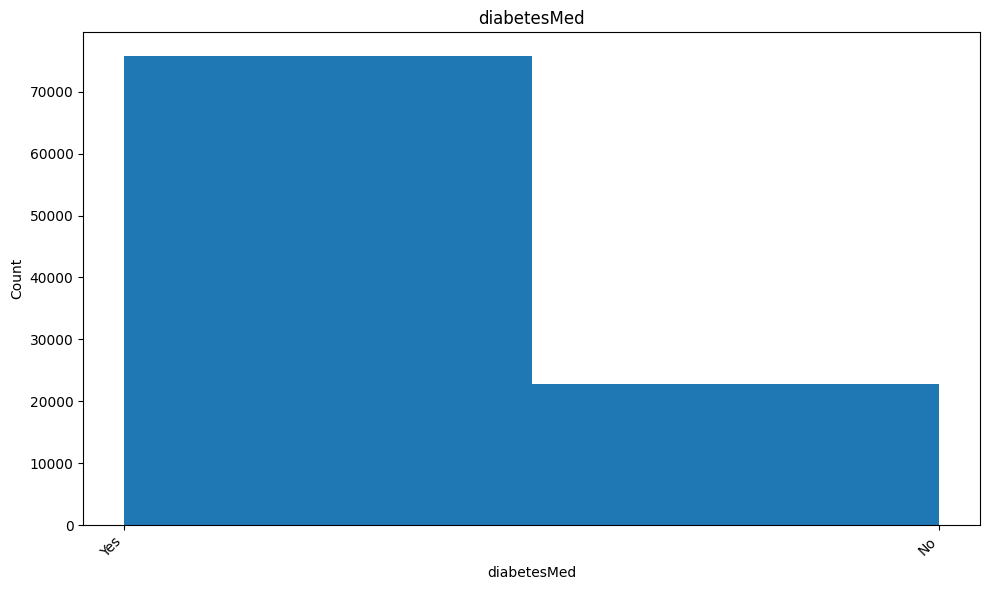

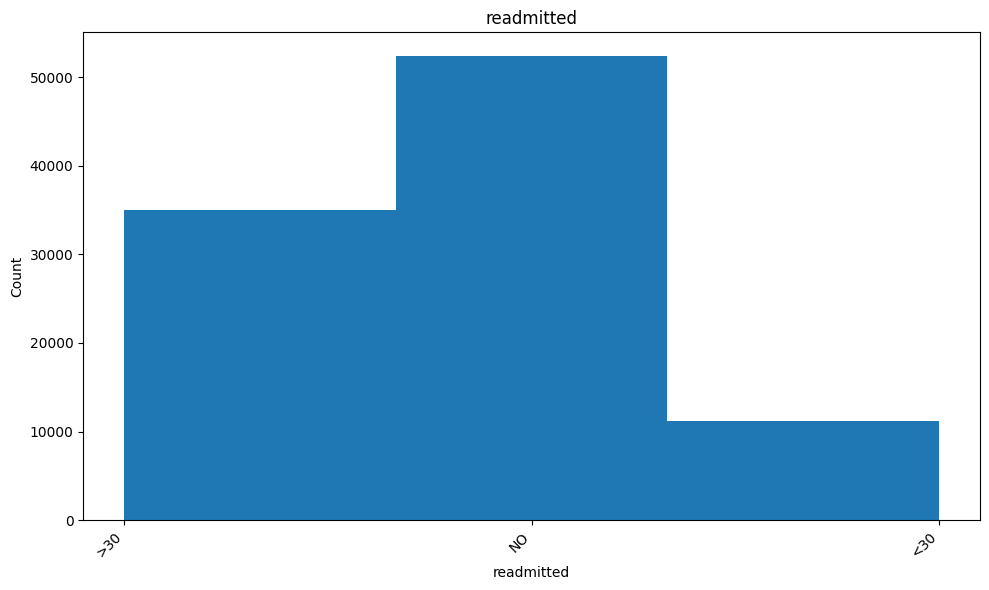

In [181]:
# prompt: You are a data analyst. Write code to plot the histogram of every feature in the dataset. Do not plot for encounter_id or patient_nbr. Title should be the feature name, example diag_1, diag_2, etc. and the x-axis is the unique value or string for which the count  is plotted on the y-axis.

# Assuming 'data' is your DataFrame
for feature in data.columns:
  if feature not in ['encounter_id', 'patient_nbr']:
    plt.figure(figsize=(10, 6))
    plt.hist(data[feature], bins=data[feature].nunique())
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

# Feature Engineering

Service utilization: Sum of the features number_inpatient, emergency room visits number_emergency and outpatient visits number_outpatient for a given patient encounter. It measures quantity of hospital/clinic services a person has used for each encounter. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.

In [182]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.


In [183]:
# List of drug names
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
         'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
         'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
         'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone',
         'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

# Create a new column 'numchange' by summing the boolean conditions
data['numchange'] = data[drugs].apply(lambda x: (x != 'No') & (x != 'Steady')).sum(axis=1)

# Display the value counts of 'numchange'
print(data['numchange'].value_counts())

numchange
0    71661
1    25514
2     1291
3      107
4        5
Name: count, dtype: int64
